In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/5_one_hot_encoding/Exercise/carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


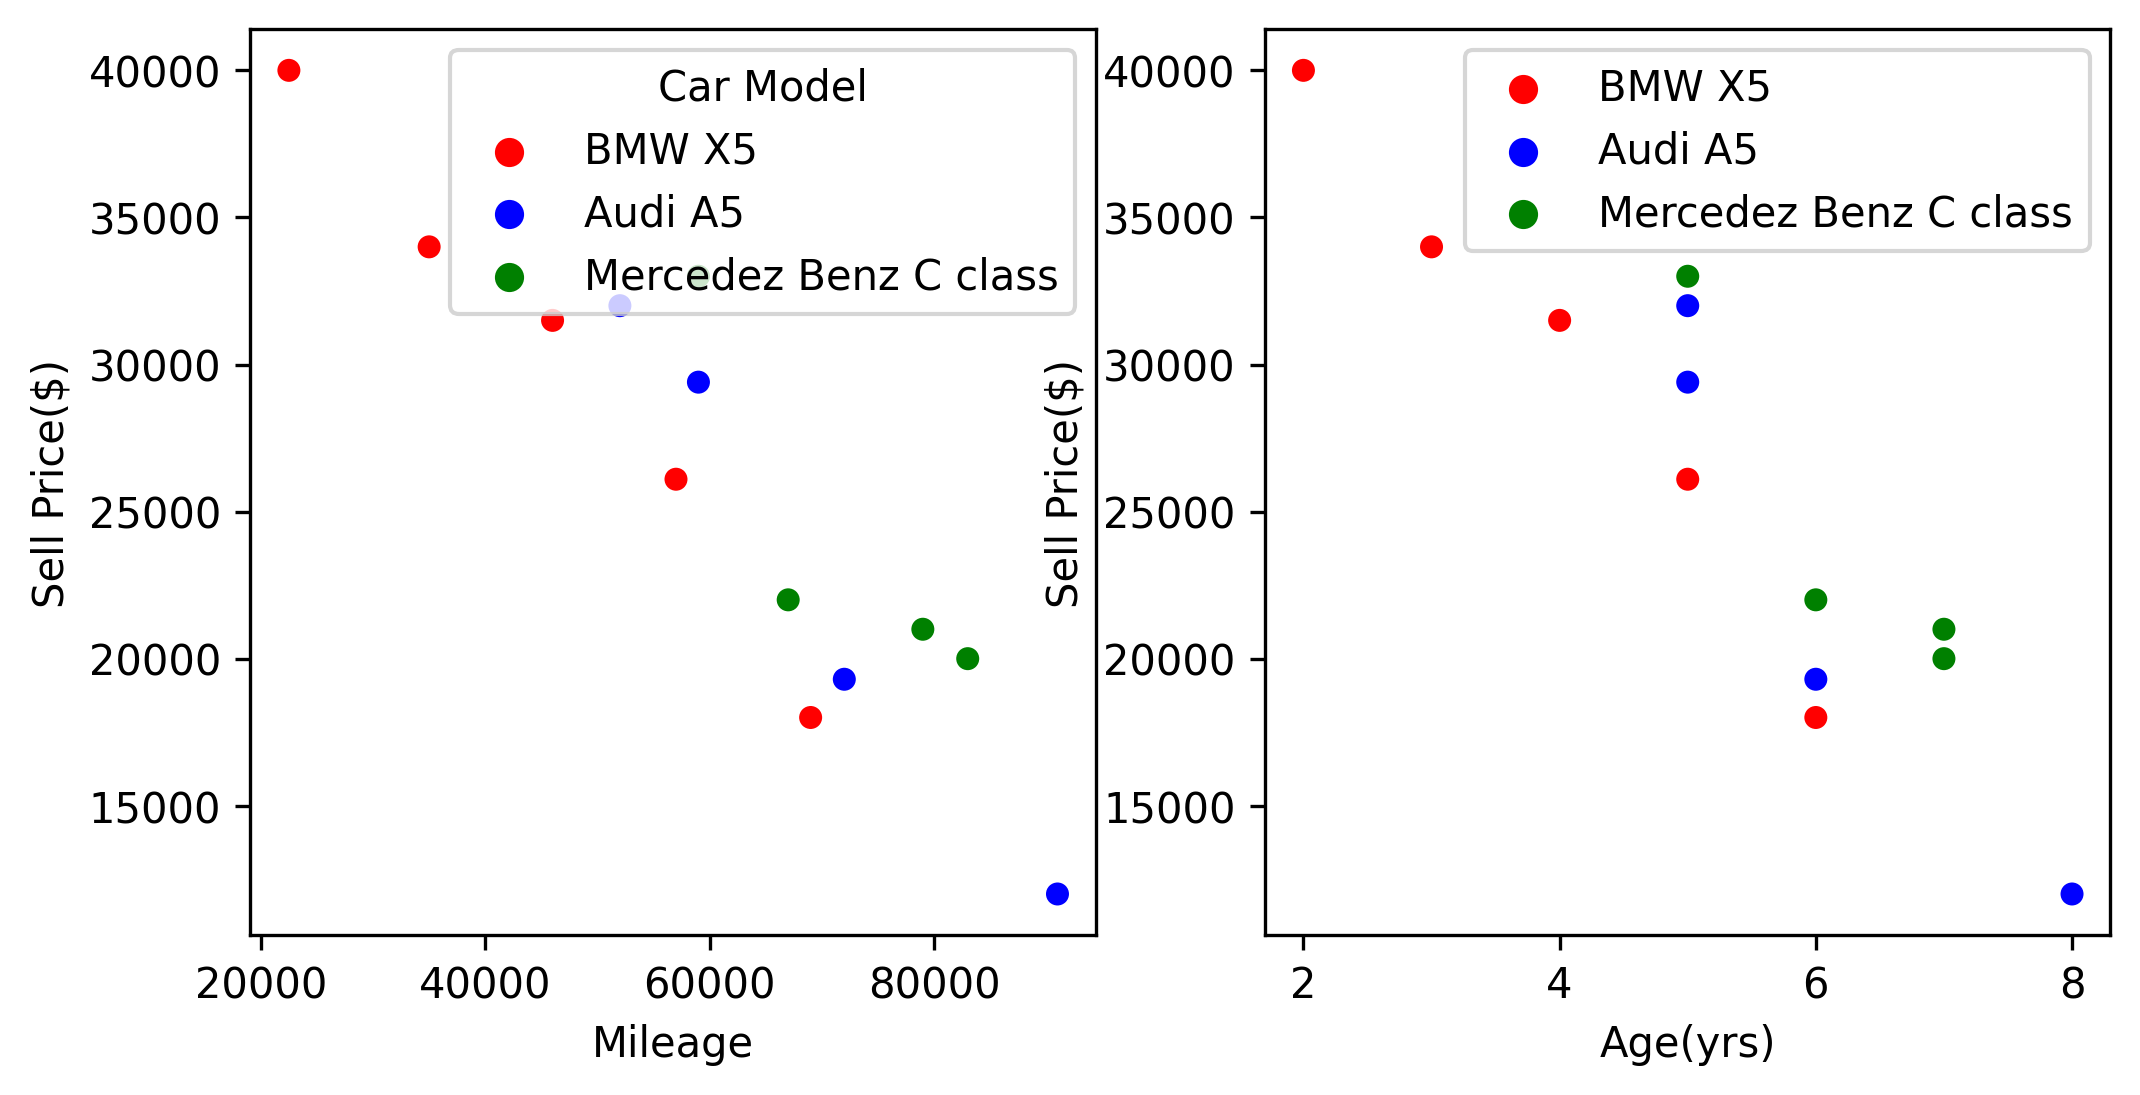

In [50]:
plt.figure(dpi = 300, figsize=(8,4))
plt.subplot(1,2,1)
sns.scatterplot(x = 'Mileage',y = 'Sell Price($)', hue = 'Car Model',data = df,palette = ['red','blue','green'])
plt.subplot(1,2,2)
sns.scatterplot(x = 'Age(yrs)',y = 'Sell Price($)', hue = 'Car Model',data = df,palette = ['red','blue','green'])
plt.legend(loc=1)

## Using Get Dummies

In [52]:
dummies = pd.get_dummies(df['Car Model'],drop_first = True)
dummies

,BMW X5,Mercedez Benz C class
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,1


In [53]:
new_df = pd.concat([df,dummies],axis = 'columns')
new_df

,Car Model,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,1,0
1,BMW X5,35000,34000,3,1,0
2,BMW X5,57000,26100,5,1,0
3,BMW X5,22500,40000,2,1,0
4,BMW X5,46000,31500,4,1,0
5,Audi A5,59000,29400,5,0,0
6,Audi A5,52000,32000,5,0,0
7,Audi A5,72000,19300,6,0,0
8,Audi A5,91000,12000,8,0,0
9,Mercedez Benz C class,67000,22000,6,0,1


In [75]:
model_dummies = LinearRegression()
X_dummies = new_df[['Mileage','Age(yrs)','BMW X5','Mercedez Benz C class']]
y_dummies = new_df['Sell Price($)']
model_dummies.fit(X_dummies,y_dummies)

LinearRegression()

In [76]:
model_dummies.intercept_

56523.085231274956

In [77]:
model_dummies.coef_

array([-3.70122094e-01, -1.33245363e+03, -4.28466659e+03,  2.45354074e+03])

## Using One Hot Encoding

In [57]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(df['Car Model'])
encoded_labels

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2])

In [58]:
dfle = df
dfle['Car Model'] = encoded_labels

In [59]:
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [60]:
X = df[['Car Model','Mileage','Age(yrs)']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [61]:
y = df['Sell Price($)'].values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [62]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Car Model', OneHotEncoder(), [0])], remainder = 'passthrough')

In [63]:
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [70]:
ct.get_feature_names()

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Car Model__x0_0', 'Car Model__x0_1', 'Car Model__x0_2', 'x1', 'x2']

In [64]:
X = X[:,1:]
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [65]:
model_ohe = LinearRegression()
model_ohe.fit(X,y)

LinearRegression()

In [66]:
model_ohe.intercept_

56523.08523128701

In [67]:
model_ohe.coef_

array([-4.28466659e+03,  2.45354074e+03, -3.70122094e-01, -1.33245363e+03])

## Exercise
At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [68]:
#1
model_dummies.predict([[45000,4,0,1]])[0]

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36991.31721061282

In [71]:
model_ohe.predict([[0,1,45000,4]])[0]

36991.31721061585

In [72]:
#2
model_dummies.predict([[86000,7,1,0]])[0]

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


11080.743132190648

In [73]:
model_ohe.predict([[1,0,86000,7]])[0]

11080.743132185147

In [74]:
model_ohe.score(X,y)

0.9417050937281082

In [78]:
model_dummies.score(X_dummies,y_dummies)

0.9417050937281082